In [192]:
#installing dependency
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [153]:
athletes = pd.read_csv("Olympic_data/athlete_events.csv", index_col="ID")
noc = pd.read_csv("Olympic_data/noc_regions.csv")

In [361]:
athletes.head(5)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,BMI
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,24.691358
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,20.761246
2,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,22.642193
3,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,24.218750
4,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,19.132653


In [155]:
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [156]:
athletes = athletes.merge(noc, on="NOC")

Function used to check the percentage of NAN values in the dataframe

In [157]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [158]:
missing_values_table(athletes)

Your selected dataframe has 16 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
notes,265728,98.1
Medal,230993,85.3
Weight,62785,23.2
Height,60083,22.2
Age,9462,3.5
region,21,0.0


In [159]:
athletes[athletes.region.isnull()].notes.unique()

array(['Refugee Olympic Team', 'Unknown', 'Tuvalu'], dtype=object)

Tulavu and Refugee Olympic team participated from undefined noc!

https://en.wikipedia.org/wiki/Tuvalu 

https://en.wikipedia.org/wiki/Refugee_Olympic_Team_at_the_2016_Summer_Olympics

In [160]:
athletes[athletes.notes.isnull()].notes.unique()

array([nan], dtype=object)

In [161]:
athletes.drop("notes",axis=1,inplace=True)

In [162]:
athletes.Sex.unique()

array(['M', 'F'], dtype=object)

In [163]:
athletes.Medal.unique()

array([nan, 'Silver', 'Bronze', 'Gold'], dtype=object)

In [164]:
Male = athletes[athletes.Sex == 'M']
Female = athletes[athletes.Sex == 'F']

In [ ]:
athletes["BMI"]  = athletes.Weight/(athletes.Height/100)**2

In [165]:
athletes.columns

Index(['Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region'],
      dtype='object')

In [166]:
print("Mean Height of Female Athletes")
print("Gold: " + str(Female[Female["Medal"] == "Gold"].Height.mean()))
print("Silver: " + str(Female[Female["Medal"] == "Silver"].Height.mean()))
print("Broze: " + str(Female[Female["Medal"] == "Bronze"].Height.mean()))
print("All Female: " + str(Female.Height.mean()))

Mean Height of Female Athletes
Gold: 170.6938717067583
Silver: 170.5057603686636
Broze: 170.24151696606788
All Female: 167.8455934823977


In [167]:
print("Mean Weight of Male Athletes")
print("Gold: " + str(Male[Male["Medal"] == "Gold"].Weight.mean()))
print("Silver: " + str(Male[Male["Medal"] == "Silver"].Weight.mean()))
print("Broze: " + str(Male[Male["Medal"] == "Bronze"].Weight.mean()))
print("All Male: " + str(athletes.Weight.mean()))

Mean Weight of Male Athletes
Gold: 79.58971537558685
Silver: 79.15937260902831
Broze: 78.85932948205205
All Male: 70.70952293948515


In [168]:
print("Mean Weight of Female Athletes")
print("Gold: " + str(Female[Female["Medal"] == "Gold"].Weight.mean()))
print("Silver: " + str(Female[Female["Medal"] == "Silver"].Weight.mean()))
print("Broze: " + str(Female[Female["Medal"] == "Bronze"].Weight.mean()))
print("All Female: " + str(Female.Weight.mean()))

Mean Weight of Female Athletes
Gold: 63.46348559790515
Silver: 63.17069266589057
Broze: 63.03499423963134
All Female: 60.025893754594414


In [230]:
print("Mean Height of Male Athletes")
print("Gold: " + str(Male[Male["Medal"] == "Gold"].Height.mean()))
print("Silver: " + str(Male[Male["Medal"] == "Silver"].Height.mean()))
print("Broze: " + str(Male[Male["Medal"] == "Bronze"].Height.mean()))
print("All Male Athletes: " + str(Male.Height.mean()))

Mean Height of Male Athletes
Gold: 181.46820891285836
Silver: 181.07517560902704
Broze: 180.91699489423777
All Athletes: 178.86112118254078


In [388]:
Male.region.value_counts().reset_index(name='Medal').head(5)

,index,Medal
0,USA,13320
1,Germany,11034
2,France,9977
3,UK,8979
4,Italy,8172


In [389]:
Female.region.value_counts().reset_index(name='Medal').head(5)

,index,Medal
0,USA,5533
1,Germany,4849
2,Russia,4105
3,Canada,3563
4,UK,3277


In [209]:
athletes[(athletes.region == "Nepal")&(athletes.Medal == "Gold")].sort_values("Year")

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
243678,Tejbir Bura,M,NaN,NaN,NaN,Nepal,NEP,1924 Winter,1924,Winter,Chamonix,Alpinism,Alpinism Mixed Alpinism,Gold,Nepal


Nepal only won one Gold since 1924! 

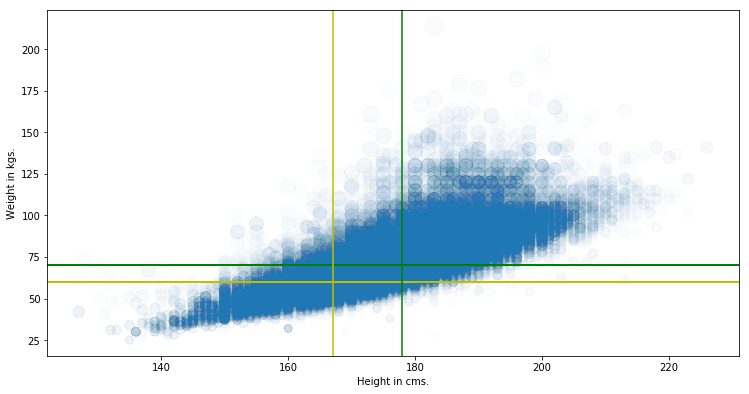

In [374]:
fig = plt.figure(figsize=(12,6))
axes = fig.add_axes([1, 1, 0.8, 0.8]) 
axes.scatter(athletes.Height, athletes.Weight, alpha=0.01, s=athletes.BMI*5, cmap='viridis');
axes.set_xlabel("Height in cms.")
axes.set_ylabel("Weight in kgs.")
#axes.set_xmargin(2)
#axes.legend()
axes.axhline(y = 60, linewidth = 2, color = "y")
axes.axhline(y = 70,  linewidth = 2, color = "g")
axes.axvline(167,color = "y")
axes.axvline(178,color = "g")

In [300]:
athletes.groupby("Sport").mean().sort_values("BMI").head(20).BMI.dropna(axis=0)

Sport
Rhythmic Gymnastics          17.286514
Synchronized Swimming        19.670156
Triathlon                    20.394810
Figure Skating               20.839866
Ski Jumping                  20.902259
Gymnastics                   21.283132
Trampolining                 21.297575
Nordic Combined              21.459709
Taekwondo                    21.609987
Boxing                       21.676824
Diving                       21.684808
Cross Country Skiing         21.843084
Biathlon                     21.879153
Lacrosse                     21.894684
Swimming                     21.996407
Tennis                       21.998798
Table Tennis                 22.035554
Athletics                    22.088738
Modern Pentathlon            22.112857
Short Track Speed Skating    22.114089
Name: BMI, dtype: float64

In [301]:
athletes.groupby("Sport").mean().sort_values("BMI").tail(10).BMI.dropna(axis=0)

Series([], Name: BMI, dtype: float64)

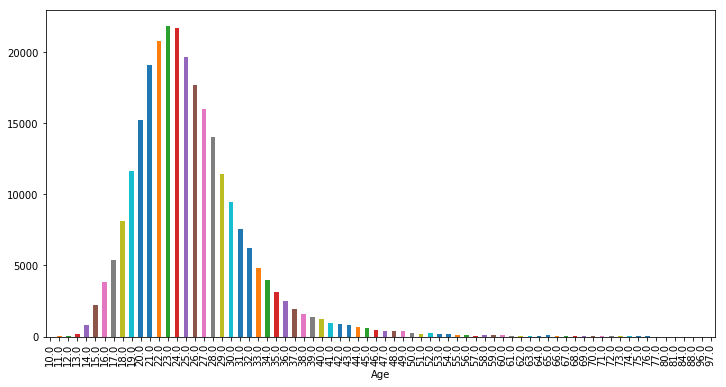

In [373]:
athletes.groupby("Age").count().Name.plot(kind="bar",figsize=(12,6));

In [323]:
BMI_list = []
for i in range(100):
    BMI_list.append(athletes[athletes["Age"]==i].BMI.mean())

In [330]:
np.array(BMI_list)

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan, 19.25196515, 19.81455663, 19.19868911, 19.32138136,
       19.57442827, 20.16067055, 20.97525378, 21.5156244 , 21.97771978,
       22.32291018, 22.54266381, 22.71690815, 22.81560013, 22.90271072,
       22.96673533, 23.07951533, 23.11505899, 23.20826163, 23.27745094,
       23.26406621, 23.41738978, 23.37366464, 23.59083194, 23.50789223,
       23.63545431, 23.72554831, 23.86139401, 23.86727164, 24.28329193,
       24.16834373, 24.04824996, 24.17667472, 24.37265626, 24.31952257,
       24.21974207, 24.47709063, 24.5081852 , 24.37960079, 23.72999252,
       23.84995577, 24.37251716, 24.44482992, 23.4858247 , 24.8311775 ,
       24.39278497, 23.93757366, 24.30406076, 23.24285945, 26.06316041,
       23.79112039, 23.62848737, 23.04259062, 24.45194886, 21.71806609,
       24.50777209, 25.08208237, 21.96712018, 25.2493372 , 25.14

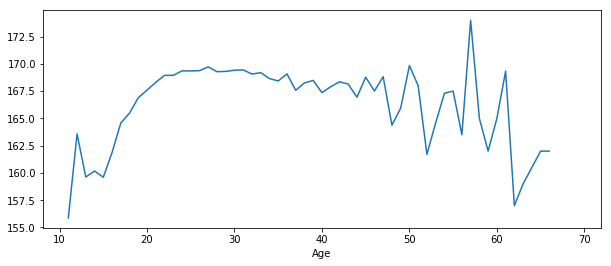

In [370]:
Female.groupby("Age").Height.mean().plot(figsize=(10,4));

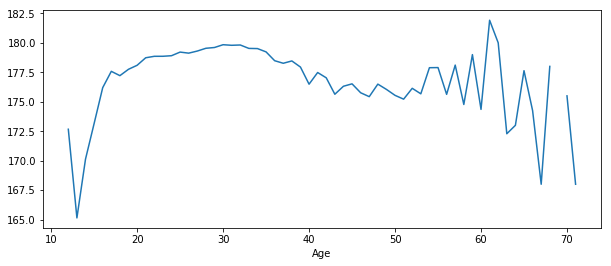

In [371]:
Male.groupby("Age").Height.mean().plot(figsize=(10,4));

In [387]:
Male.groupby("Name").Medal.count().sort_values().tail(10)

Name
Ryan Steven Lochte              12
Paavo Johannes Nurmi            12
Sawao Kato                      12
Aleksey Yuryevich Nemov         12
Borys Anfiyanovych Shakhlin     13
Takashi Ono                     13
Ole Einar Bjrndalen             13
Edoardo Mangiarotti             13
Nikolay Yefimovich Andrianov    15
Michael Fred Phelps, II         28
Name: Medal, dtype: int64